In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Loading the Dataset

In [418]:
diabetesDF = pd.DataFrame(pd.read_csv('Weights/diabetes2.csv'))

In [419]:
print(diabetesDF.shape)
diabetesDF.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocessing the Dataset

## Getting basic information about the dataset

In [420]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [421]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Dividing the dataset in Train, Validation and Test sets

In [422]:
trainData, validationData, testData = np.split(diabetesDF.sample(frac=1).reset_index(drop=True), [int(.7*len(diabetesDF)), int(.9*len(diabetesDF))])

In [423]:
trainData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,125,80,0,0,32.3,0.536,27,1
1,6,109,60,27,0,25.0,0.206,27,0
2,3,99,80,11,64,19.3,0.284,30,0
3,4,83,86,19,0,29.3,0.317,34,0
4,1,87,68,34,77,37.6,0.401,24,0


In [424]:
print(trainData.shape, validationData.shape, testData.shape)

(537, 9) (154, 9) (77, 9)


In [425]:
trainData = trainData.values.astype(np.float128)
validationData = validationData.values.astype(np.float128)
testData = testData.values.astype(np.float128)


In [426]:
X_train = trainData[:, :8]
y_train = trainData[:,8]
X_validation = validationData[:, :8]
y_validation = validationData[:,8]
X_test = testData[:, :8]
y_test = testData[:,8]


In [427]:
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(537, 8) (537,) (154, 8) (154,) (77, 8) (77,)


## Normalize the data(each feature should have mean 0 and standard deviation 1)

In [428]:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)

In [429]:
X_train = (X_train - X_mean)/X_std
X_validation = (X_validation - X_mean)/X_std
X_test = (X_test - X_mean)/X_std

In [430]:
# adding a column of 1's in the start of the training and test datas to denote X0
trainOnes = np.ones((trainData.shape[0], 1))
validationOnes = np.ones((validationData.shape[0], 1))
testOnes = np.ones((testData.shape[0], 1))
print(trainOnes.shape, validationOnes.shape, testOnes.shape)
X_train = np.hstack((trainOnes, X_train))
X_validation = np.hstack((validationOnes, X_validation))
X_test = np.hstack((testOnes, X_test))
print(X_train.shape, X_validation.shape ,X_test.shape)


(537, 1) (154, 1) (77, 1)
(537, 9) (154, 9) (77, 9)


In [431]:
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))

[ 1.00000000e+00  9.69119260e-21  8.56055347e-20  5.97623544e-20
  5.49167581e-20  3.23039753e-20 -1.39714693e-19 -6.46079507e-20
  1.93823852e-20]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]


# Logistic Regression

## Necessary Functions

In [432]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [433]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [434]:
def error(X, y, theta):
    hypo = hypothesis(X, theta)
    return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))

In [435]:
def gradient(X, y, theta):
    m = X.shape[0]
    hypo = hypothesis(X, theta)
    grad = -np.dot(X.T, (y - hypo)) 
    return grad/m   

## Logistic Regression with Batch Gradient Descent(BGD)

In [436]:
def batchGradientDescent(X_train, y_train, X_validation, y_validation, learningRate=0.01, maxEpochs=1000):
    m, n = X_train.shape
    theta = np.zeros((n,))
    trainErrorList = []
    validationErrorList = []
    for i in tqdm(range(maxEpochs)):
        trainErr = error(X_train, y_train, theta)
        trainErrorList.append(trainErr)
        validationErr = error(X_validation, y_validation, theta)
        validationErrorList.append(validationErr)
        grad = gradient(X_train, y_train, theta)
        theta = theta - learningRate * grad
    return theta, trainErrorList, validationErrorList


In [437]:
mainTheta, trainErrorList, validationErrorList = batchGradientDescent(X_train, y_train, X_validation, y_validation, 0.01, 1500)

100%|██████████| 1500/1500 [00:00<00:00, 1842.54it/s]


In [438]:
mainTheta

array([-0.68507685,  0.41319313,  0.92198588, -0.28446812, -0.01426341,
        0.01391646,  0.5851762 ,  0.27003812,  0.14736659], dtype=float128)

## Loss Plots

In [439]:
def drawBGDPlots(learningRate=0.01, maxEpochs=1000):
    theta, trainErrorList, validationErrorList = batchGradientDescent(
        X_train, y_train, X_validation, y_validation, learningRate, 1000)
    plt.plot(trainErrorList, label='Training Error', color='blue')
    plt.plot(validationErrorList, label='Validation Error', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


100%|██████████| 1000/1000 [00:00<00:00, 1733.14it/s]


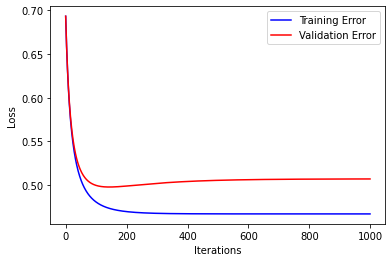

In [440]:
drawBGDPlots(0.1)

100%|██████████| 1000/1000 [00:00<00:00, 1802.68it/s]


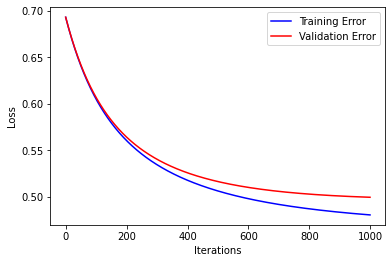

In [441]:
drawBGDPlots(0.01)


100%|██████████| 1000/1000 [00:01<00:00, 908.50it/s]


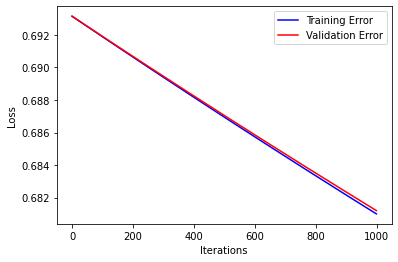

In [442]:
drawBGDPlots(0.0001)


100%|██████████| 1000/1000 [00:00<00:00, 2400.49it/s]


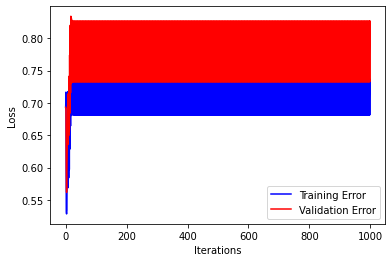

In [443]:
drawBGDPlots(10)

In [444]:
def getPredictionList(X, theta):
    hypo = hypothesis(X, theta)
    output = np.zeros((X.shape[0],))
    output[hypo >= 0.5] = 1
    output = output.astype('int')
    return output

In [445]:
def getConfusionMatrix(X, y, theta):
    y_ = getPredictionList(X, theta)
    confusionMatrix = np.zeros((2, 2))
    for i in tqdm(range(y.shape[0])):
        confusionMatrix[int(y[i]), int(y_[i])] += 1
    accuracy = (confusionMatrix[0, 0] + confusionMatrix[1, 1]) / np.sum(confusionMatrix)
    precision = (confusionMatrix[0, 0]) / confusionMatrix[:, 0].sum()
    recall = (confusionMatrix[0, 0]) / confusionMatrix[0, :].sum()
    f1 = 2 * precision * recall / (precision + recall)
    print(confusionMatrix)
    print('Accuracy: ' + str(accuracy))
    print('Precision: ' + str(precision))
    print('Recall: ' + str(recall))
    print('F1: ' + str(f1))

In [446]:
getConfusionMatrix(X_test, y_test, mainTheta)

100%|██████████| 77/77 [00:00<00:00, 93666.30it/s]

[[52.  5.]
 [12.  8.]]
Accuracy: 0.7792207792207793
Precision: 0.8125
Recall: 0.9122807017543859
F1: 0.859504132231405


## Logistic Regression with Stochastic Gradient Descent(SGD)

In [447]:
def stochasticGradientDescent(X_train, y_train, X_validation, y_validation, learningRate=0.01, maxEpochs=1000):
    m, n = X_train.shape
    theta = np.zeros((n,))
    trainErrorList = []
    validationErrorList = []
    for i in tqdm(range(maxEpochs)):
        trainErr = error(X_train, y_train, theta)
        trainErrorList.append(trainErr)
        validationErr = error(X_validation, y_validation, theta)
        validationErrorList.append(validationErr)
        grad = gradient(X_train, y_train, theta)
        theta = theta - learningRate * grad
    return theta, trainErrorList, validationErrorList
